# EXPLORATORY DATA ANALYSIS

Make sure that any plot on your report is meaningful in the sense that it affected your decisions regarding your project direction. DO include an explanation of how each plot or meaningful insight you have on your report shapes the project direction. It could affect how you decided to handle specific features, the baseline model you chose, the feature engineering you did, etc. 

- <u>**Meaningful Insights**</u>: : The EDA report should provide meaningful insights that can be connected back to the problem at hand. These insights should be well-supported by the data and provide actionable recommendations for addressing the problem. You should focus on providing insights that are relevant to the project question and will add value to the final analysis.

- <u>**Clean and Labeled Visualization**</u>: Visualization is an important component of EDA and should be clean, labeled, and well-presented. You need to ensure that your visualizations are easy to understand and can be included in their final presentation slides or report. Anyone that reads your EDA should be able to understand what is depicted in the plots just by looking at them.

- <u>**Data Description**</u>: You should provide a detailed description of the data for your project. This should include information about the data source, the data collection process, and any preprocessing steps that were taken. Additionally, you should describe the methods you used to explore the data, including initial explorations, data cleaning, and reconciliation.

- <u>**Noteworthy Findings**</u>: Summarize the noteworthy findings of their EDA in a clear and concise manner. This can be achieved through the use of visualizations and captions that highlight the most important insights gained through the analysis.

- <u>**Project Question**</u>: Based on the insights gained through EDA, you should develop a clear project question that will guide your analysis. This question should be well-defined and specific to the problem at hand.

- <u>**Baseline Model or Implementation Plan**</u>: Finally, you should include a baseline model or a clear plan for its implementation. This can include details on the model architecture, the data used for training and validation, and the evaluation metrics used to assess model performance.

In [2]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [3]:
df = pd.read_csv('oecd_data_cleaned.csv')

## Summary of the Data

The EDA report should begin with a brief summary of the data. This summary should include information such as the shape of the data, data types, and descriptive statistics such as mean, max, and dtypes. Additionally, you should provide a summary of the features of the data, including histograms, correlation plots, and clustering plots.

## Data Missingness

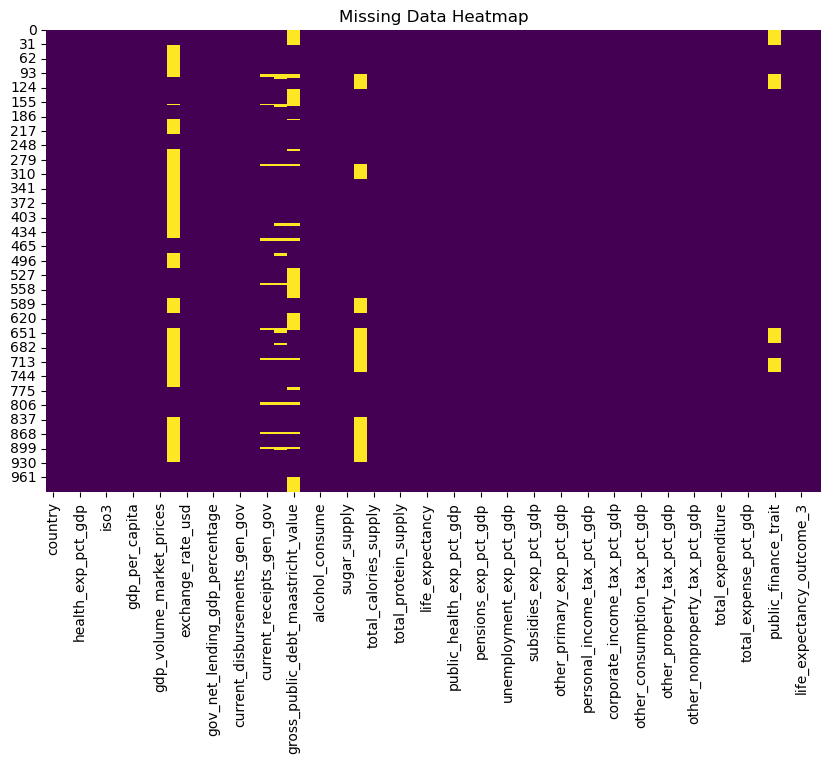

In [4]:
# Heatmap of missing data
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Data Heatmap')
plt.show()

## Life Expectancy Over Time By Country

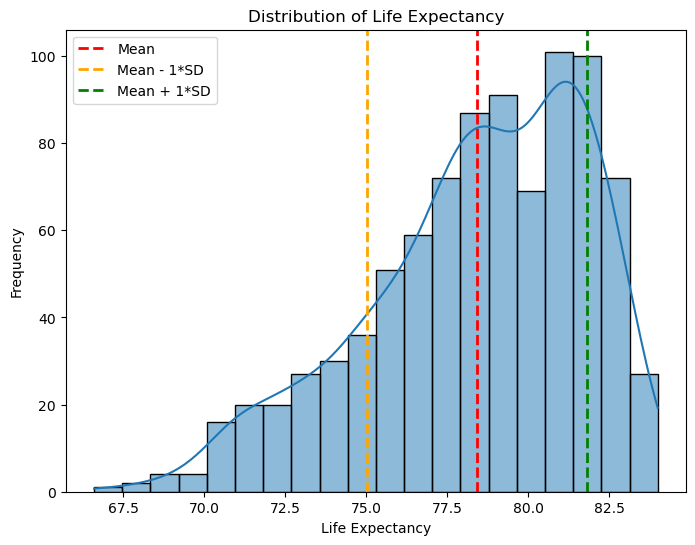

In [42]:
# Create a histogram for life_expectancy_outcome_3
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='life_expectancy_outcome_3', bins=20, kde=True)
plt.title('Distribution of Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')

# Calculate mean and standard deviation
mean = df['life_expectancy_outcome_3'].mean()
std = df['life_expectancy_outcome_3'].std()

# Plot vertical lines for mean, mean - 1*std, and mean + 1*std
plt.axvline(mean, color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(mean - std, color='orange', linestyle='dashed', linewidth=2, label='Mean - 1*SD')
plt.axvline(mean + std, color='green', linestyle='dashed', linewidth=2, label='Mean + 1*SD')

plt.legend()
plt.show()

/var/folders/vw/1sthm_ts1dj_1hqg1xnsz19w0000gn/T/ipykernel_32416/2273173258.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='year', y='life_expectancy', hue='continent', ci=None)


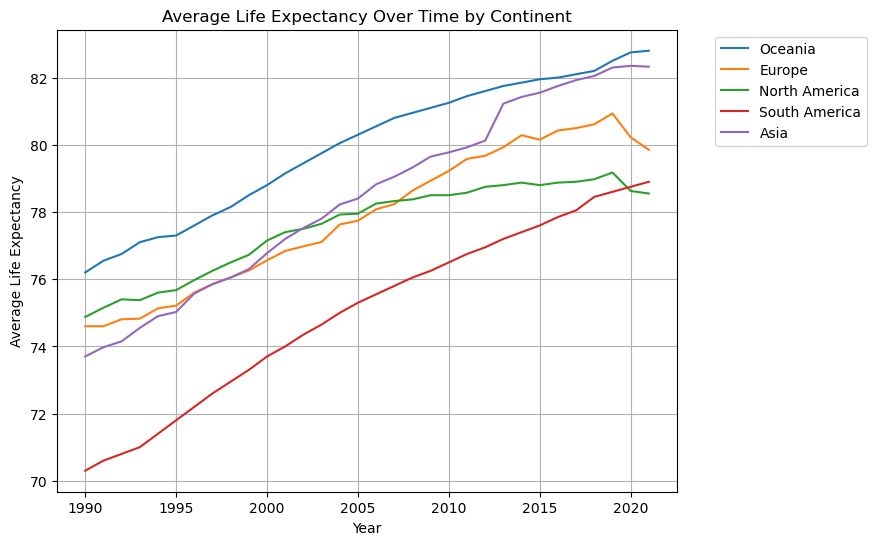

In [30]:
plt.figure(figsize=(8, 6))
sns.lineplot(data=df, x='year', y='life_expectancy', hue='continent', ci=None)
plt.title('Average Life Expectancy Over Time by Continent')
plt.xlabel('Year')
plt.ylabel('Average Life Expectancy')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Adding gridlines
plt.grid(True)

plt.show()

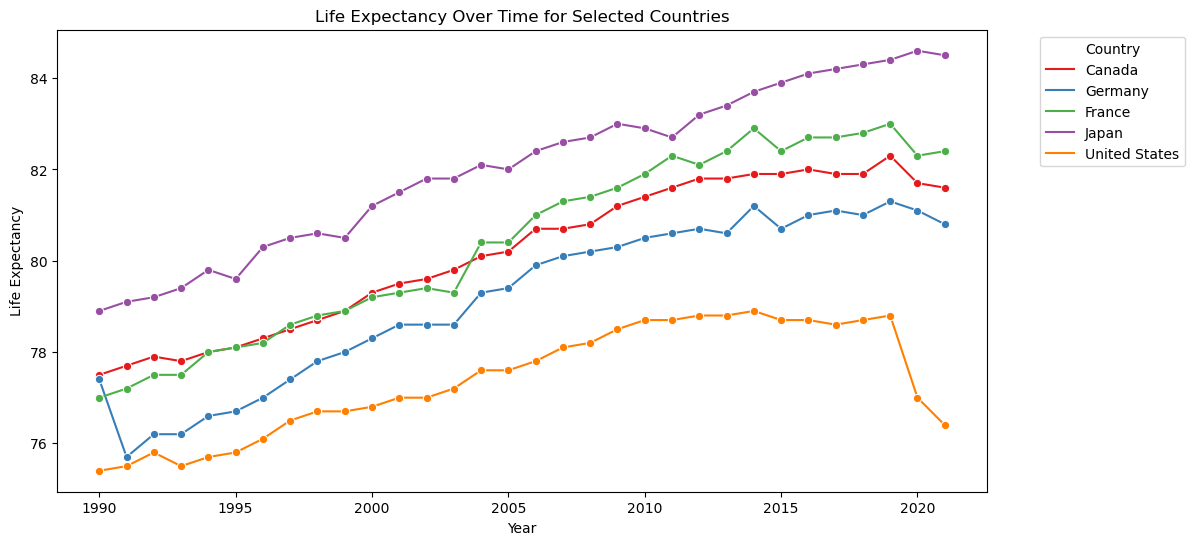

In [20]:
# Line plot of life expectancy over time for selected countries
countries_to_compare = ['United States', 'Canada', 'Germany', 'France', 'Japan']
selected_data = df[df['country'].isin(countries_to_compare)]

plt.figure(figsize=(12, 6))
sns.lineplot(data=selected_data, x='year', y='life_expectancy', hue='country', marker='o', palette='Set1')
plt.title('Life Expectancy Over Time for Selected Countries')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

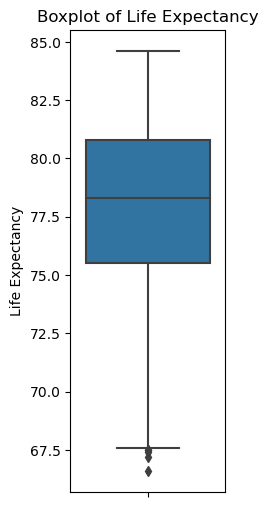

In [12]:
# Boxplot to visualize outliers in life expectancy
plt.figure(figsize=(2, 6))
sns.boxplot(data=df, y='life_expectancy')
plt.title('Boxplot of Life Expectancy')
plt.ylabel('Life Expectancy')
plt.show()

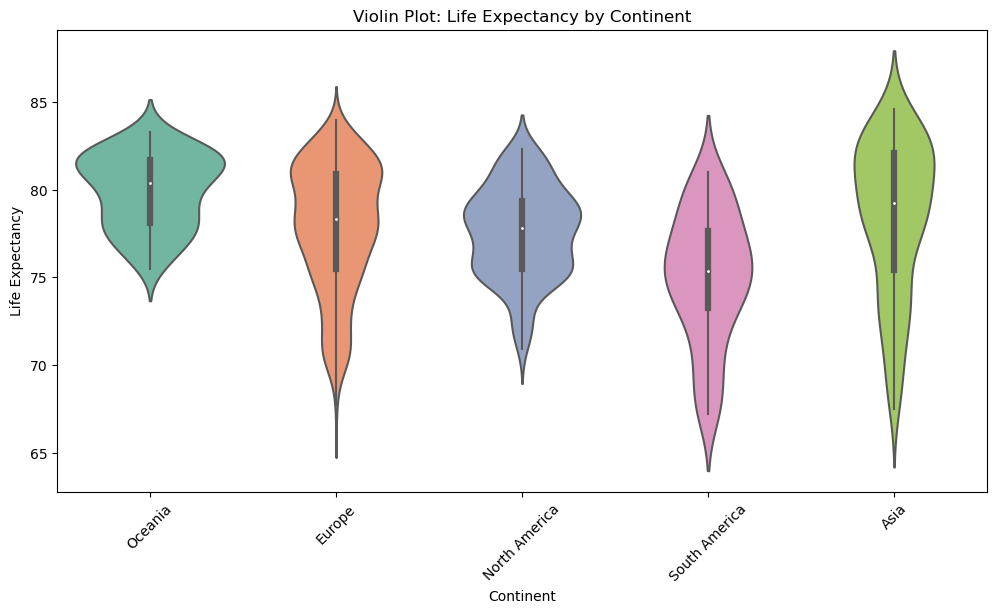

In [14]:
# Violin plot by continent
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='continent', y='life_expectancy', palette='Set2')
plt.title('Violin Plot: Life Expectancy by Continent')
plt.xlabel('Continent')
plt.ylabel('Life Expectancy')
plt.xticks(rotation=45)
plt.show()

# Correlations

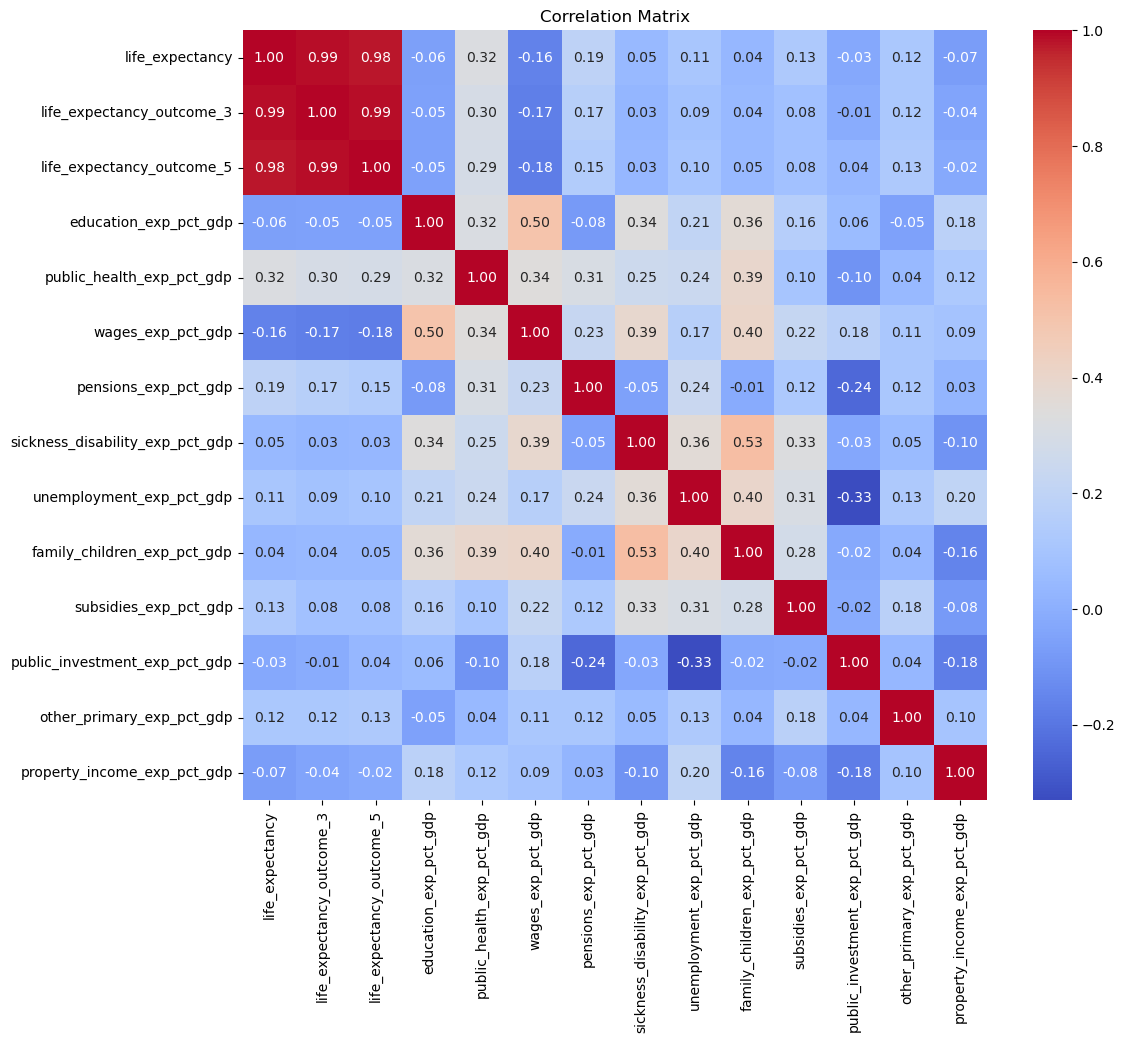

In [8]:
# Assuming your data is stored in a DataFrame called 'df'
selected_columns = [
    'life_expectancy', 'life_expectancy_outcome_3', 'life_expectancy_outcome_5', 'education_exp_pct_gdp', 'public_health_exp_pct_gdp',
    'wages_exp_pct_gdp', 'pensions_exp_pct_gdp', 'sickness_disability_exp_pct_gdp',
    'unemployment_exp_pct_gdp', 'family_children_exp_pct_gdp', 'subsidies_exp_pct_gdp',
    'public_investment_exp_pct_gdp', 'other_primary_exp_pct_gdp',
    'property_income_exp_pct_gdp'
]

# Select the columns you need
corr_matrix = df[selected_columns].corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

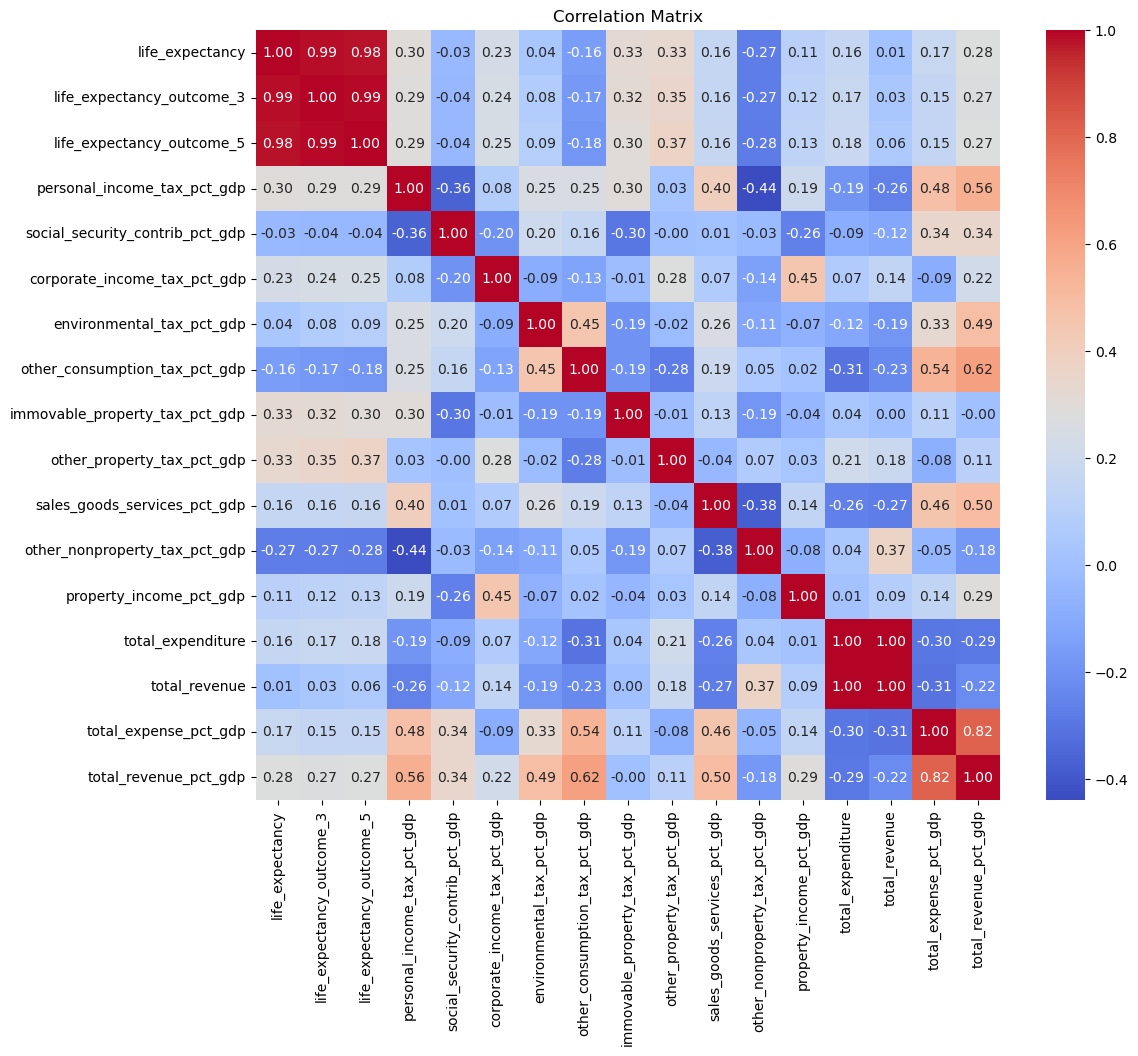

In [9]:
# Assuming your data is stored in a DataFrame called 'df'
selected_columns = [
    'life_expectancy', 'life_expectancy_outcome_3', 'life_expectancy_outcome_5', 'personal_income_tax_pct_gdp',
    'social_security_contrib_pct_gdp', 'corporate_income_tax_pct_gdp',
    'environmental_tax_pct_gdp', 'other_consumption_tax_pct_gdp',
    'immovable_property_tax_pct_gdp', 'other_property_tax_pct_gdp',
    'sales_goods_services_pct_gdp', 'other_nonproperty_tax_pct_gdp',
    'property_income_pct_gdp', 'total_expenditure', 'total_revenue',
    'total_expense_pct_gdp', 'total_revenue_pct_gdp'
]

# Select the columns you need
corr_matrix = df[selected_columns].corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Relationships

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


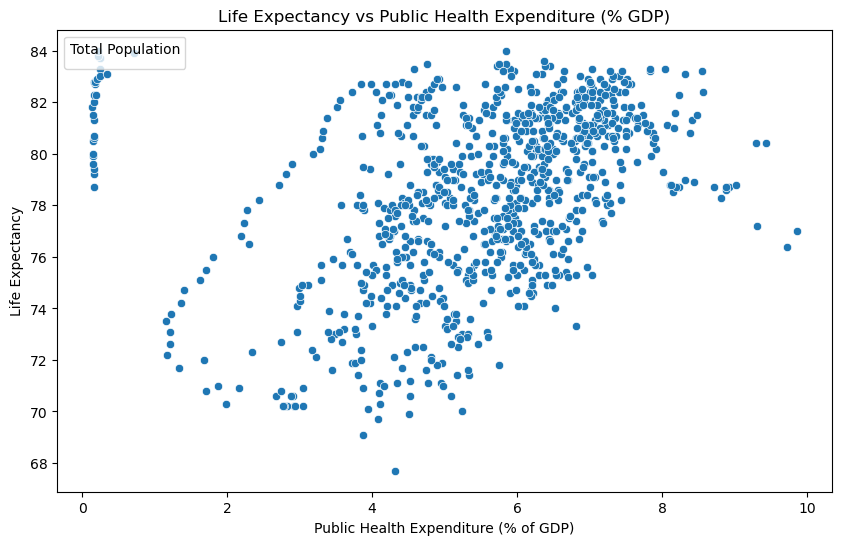

In [45]:
# Scatter plot of Life Expectancy vs Public Health Expenditure with Population size
plt.figure(figsize=(10, 6))
sns.scatterplot(x='public_health_exp_pct_gdp', y='life_expectancy', data=df, sizes=(50, 200))
plt.title('Life Expectancy vs Public Health Expenditure (% GDP)')
plt.xlabel('Public Health Expenditure (% of GDP)')
plt.ylabel('Life Expectancy')
plt.legend(title='Total Population', loc='upper left')
plt.show()

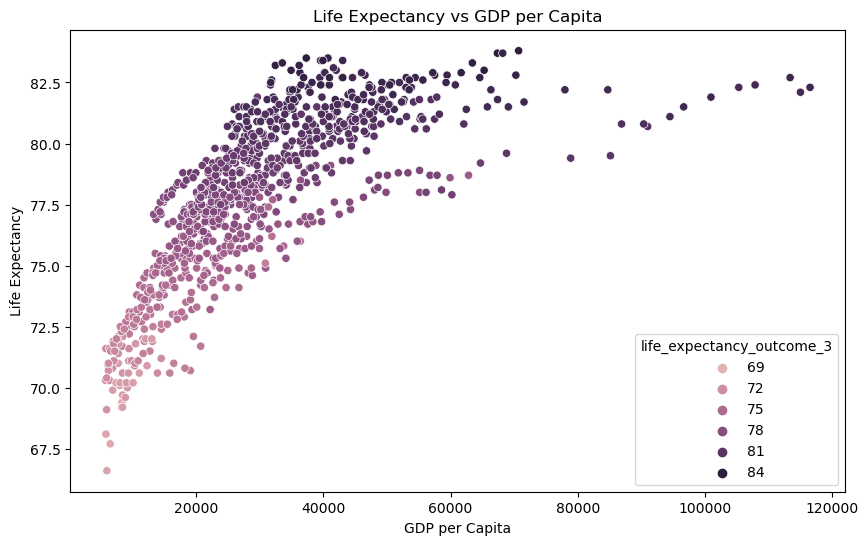

In [43]:
# Initial EDA Visualization: Scatter plot of Life Expectancy vs GDP per Capita
plt.figure(figsize=(10, 6))
sns.scatterplot(x='gdp_per_capita', y='life_expectancy', hue='life_expectancy_outcome_3', data=df)
plt.title('Life Expectancy vs GDP per Capita')
plt.xlabel('GDP per Capita')
plt.ylabel('Life Expectancy')
plt.show()

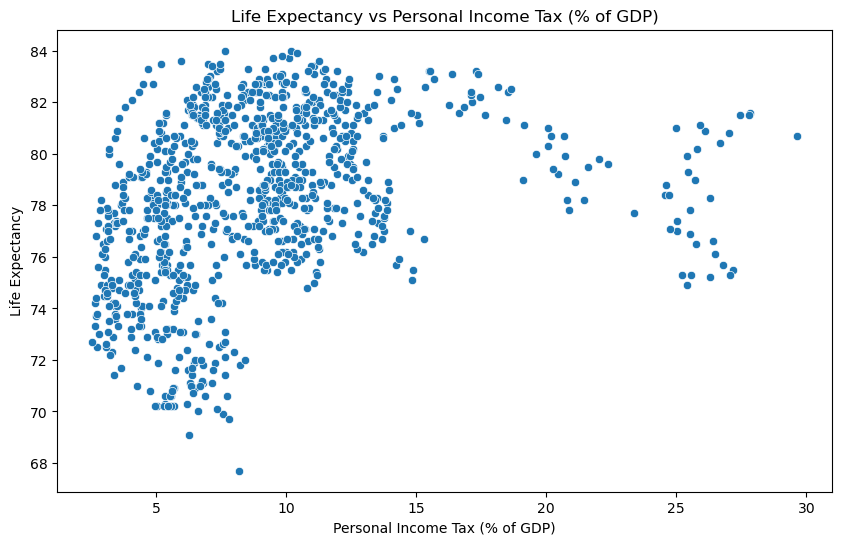

In [46]:
# Scatter plot of Life Expectancy vs Personal Income Tax (% of GDP)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='personal_income_tax_pct_gdp', y='life_expectancy', data=df)
plt.title('Life Expectancy vs Personal Income Tax (% of GDP)')
plt.xlabel('Personal Income Tax (% of GDP)')
plt.ylabel('Life Expectancy')
plt.show()

## Deeper Understanding of the Data

While basic EDA is important, you should aim to provide a deeper understanding of the data through your analysis. This can be achieved by identifying patterns, trends, class imbalances, and outliers in the data. Additionally, explore the relationships between variables and identify any potential confounding variables that may impact the analysis.

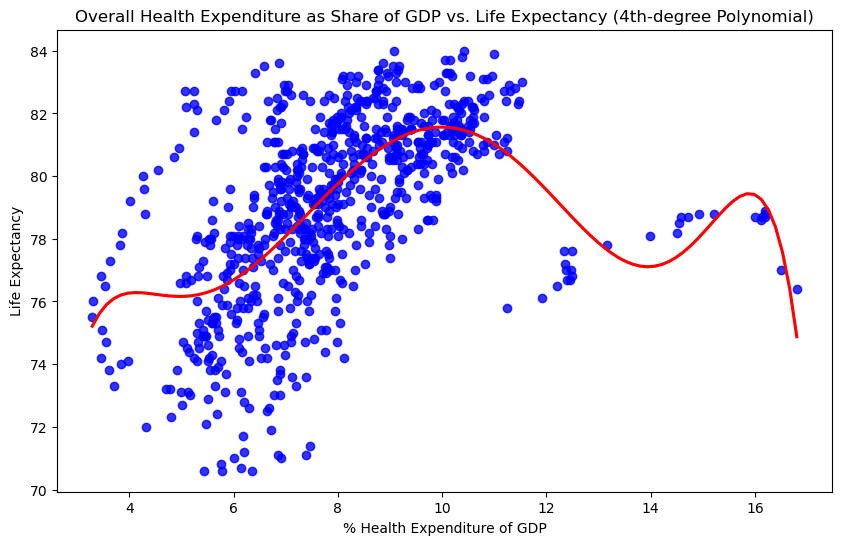

In [48]:
plt.figure(figsize=(10, 6))

# Create a scatterplot with a 4th-degree polynomial regression line and no confidence interval shading
sns.regplot(data=df, x='health_exp_pct_gdp', y='life_expectancy_outcome_5', scatter_kws={'color': 'blue'}, order=8, ci=None, line_kws={'color': 'red'})

plt.title('Overall Health Expenditure as Share of GDP vs. Life Expectancy (4th-degree Polynomial)')
plt.xlabel('% Health Expenditure of GDP')
plt.ylabel('Life Expectancy')
plt.show()